In [4]:
!pip install quandl

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 2.3MB 8.4MB/s 
     |████████████████████████████████| 102kB 26.6MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=c9070fa57b05ee1e07270d172f7353e9701fdab91a9b7ce451ee02c35b163eb9
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [0]:
import pandas as pd
import quandl

In [0]:
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2019-01-01')




In [0]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date = end)
cisco= quandl.get('WIKI/CSCO.11', start_date=start, end_date = end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date = end)


In [8]:
aapl.head()

,Adj. Close
Date,
2014-01-02,73.523423
2014-01-03,71.908415
2014-01-06,72.300536
2014-01-07,71.783135
2014-01-08,72.238063


In [0]:
for stock in [aapl,cisco,ibm,amzn]:
  stock['norm returns'] = stock['Adj. Close'] /stock['Adj. Close'][0]

In [10]:
cisco.head()

,Adj. Close,norm returns
Date,,
2014-01-02,19.451083,1.000000
2014-01-03,19.433400,0.999091
2014-01-06,19.459924,1.000455
2014-01-07,19.725166,1.014091
2014-01-08,19.710136,1.013318


In [0]:
normed_df = pd.concat([aapl['norm returns'], cisco['norm returns'],ibm['norm returns'],amzn['norm returns']], axis = 1 )
normed_df.columns = ['aapl returns', 'cisco returns', 'ibm returns','amzn returns']


In [12]:
weights = [0.3,0.2,0.4,0.1]
stocks = [aapl,cisco,ibm,amzn]

for stock,allo in zip(stocks, weights):
  stock['portfolio returns'] = stock['norm returns'] * allo
  
cisco.head()

,Adj. Close,norm returns,portfolio returns
Date,,,
2014-01-02,19.451083,1.000000,0.200000
2014-01-03,19.433400,0.999091,0.199818
2014-01-06,19.459924,1.000455,0.200091
2014-01-07,19.725166,1.014091,0.202818
2014-01-08,19.710136,1.013318,0.202664


In [0]:
returns_df = pd.concat([aapl['portfolio returns'], cisco['portfolio returns'],ibm['portfolio returns'],amzn['portfolio returns']],axis =1 )
returns_df.columns = ['aapl returns', 'cisco returns', 'ibm returns','amzn returns']


In [0]:
for col in returns_df.columns:
  returns_df[col] = returns_df[col] * 1000000

returns_df['Total return'] = returns_df.sum( axis =1)

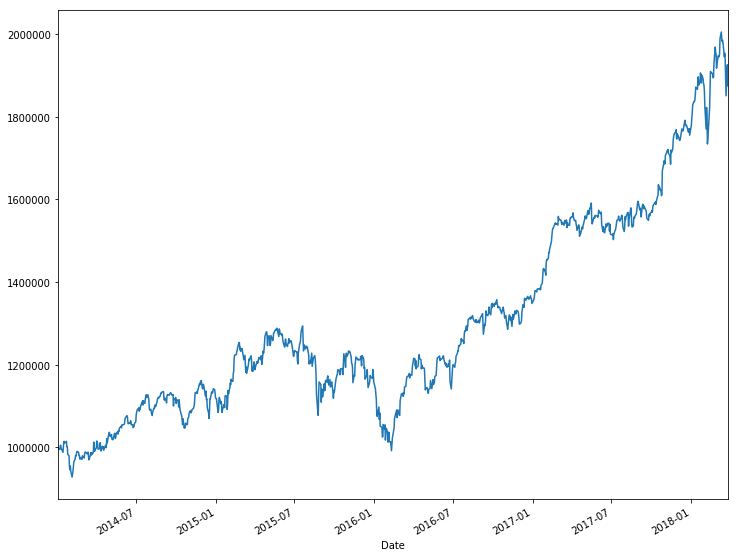

In [15]:
returns_df.dropna()['Total return'].plot(figsize = (12,10))

In [16]:
returns_df.loc[returns_df['Total return'].idxmin()]

aapl returns               NaN
cisco returns    324570.616408
ibm returns      345651.460764
amzn returns               NaN
Total return     670222.077172
Name: 2017-08-07 00:00:00, dtype: float64

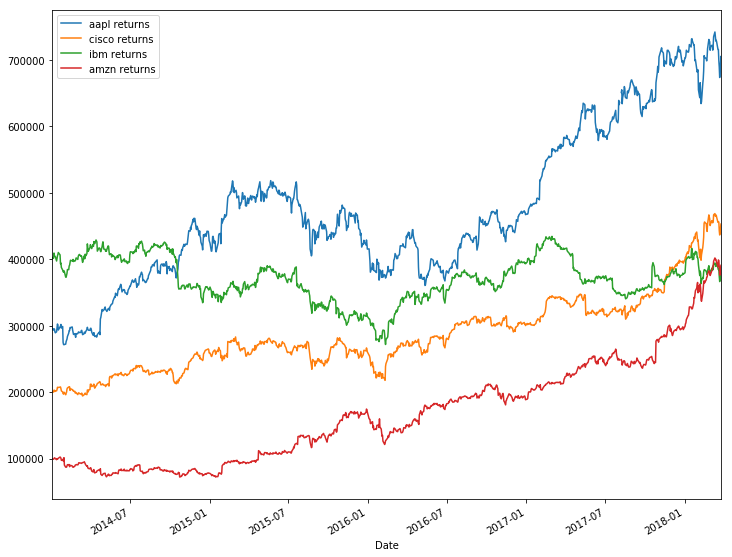

In [17]:
returns_df.drop('Total return', axis =1).plot(figsize = (12,10))

In [0]:
returns_df['daily return'] = returns_df['Total return'].pct_change(1)

In [19]:
returns_df.head()

,aapl returns,cisco returns,ibm returns,amzn returns,Total return,daily return
Date,,,,,,
2014-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2014-01-03,293410.229060,199818.181818,402393.143966,99615.548911,9.952371e+05,-0.004763
2014-01-06,295010.214597,200090.909091,401013.313211,98909.465538,9.950239e+05,-0.000214
2014-01-07,292899.047240,202818.181818,409012.019619,100015.076513,1.004744e+06,0.009769
2014-01-08,294755.301647,202663.636364,405260.604754,100992.537126,1.003672e+06,-0.001067


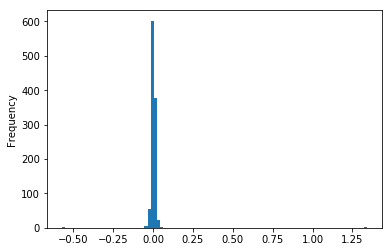

In [29]:
returns_df['daily return'].plot.hist(bins = 100)

In [26]:
returns_df.loc[returns_df.dropna()['daily return'].idxmax()]

aapl returns     6.505401e+05
cisco returns    3.228377e+05
ibm returns      3.459888e+05
amzn returns     2.487223e+05
Total return     1.568089e+06
daily return     1.339655e+00
Name: 2017-08-08 00:00:00, dtype: float64

In [37]:
daily_mean = returns_df['daily return'].mean()
daily_std = returns_df['daily return'].std()
print('mean: ' + str(daily_mean))
print ('std:' + str(daily_std))

mean: 0.001360076590759789
std:0.04577507129462265


In [0]:
cum_return = 100 * (returns_df['Total return'][-1]/returns_df['Total return'][0])

In [32]:
cum_return

187.54386449473944

In [0]:
sharperatio = daily_mean/daily_std

In [39]:
sharperatio

0.02971216761205922

In [0]:
import math
annualSR = math.sqrt(252) * sharperatio

In [41]:
annualSR

0.47166603848505934

In [0]:
# portfolio optimization using markowitz effiecient frontier

In [50]:
close_prices = pd.concat([aapl['Adj. Close'], cisco['Adj. Close'],ibm['Adj. Close'],amzn['Adj. Close']], axis=1) 
close_prices.columns = ['aapl', 'cisco', 'ibm','amzn']
close_prices.head()

,aapl,cisco,ibm,amzn
Date,,,,
2014-01-02,73.523423,19.451083,162.670896,397.97
2014-01-03,71.908415,19.433400,163.644133,396.44
2014-01-06,72.300536,19.459924,163.082988,393.63
2014-01-07,71.783135,19.725166,166.335879,398.03
2014-01-08,72.238063,19.710136,164.810264,401.92


In [51]:
close_prices.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.021966,-0.000909,0.005983,-0.003845
2014-01-06,0.005453,0.001365,-0.003429,-0.007088
2014-01-07,-0.007156,0.013630,0.019946,0.011178
2014-01-08,0.006338,-0.000762,-0.009172,0.009773


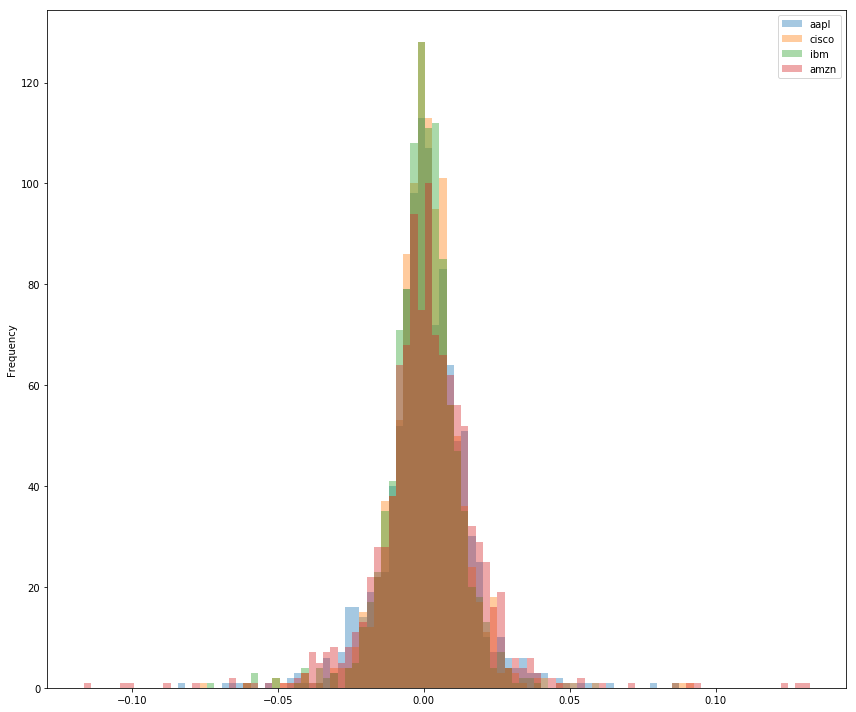

In [59]:
import numpy as np
import matplotlib.pyplot as plt
log_ret = np.log(close_prices/ close_prices.shift(1))
log_ret.plot.hist(bins = 100, figsize = (12,10), alpha = 0.4)
plt.tight_layout()

In [60]:
log_ret.mean()

aapl     0.000758
cisco    0.000739
ibm     -0.000064
amzn     0.001245
dtype: float64

In [62]:
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.052099,0.019478,0.014094,0.023698
cisco,0.019478,0.040301,0.017739,0.019521
ibm,0.014094,0.017739,0.036443,0.014471
amzn,0.023698,0.019521,0.014471,0.086835


In [71]:
print('weights')
weight = np.array(np.random.random(4))
print (weight)

print('rebalance')
weight = weight/np.sum(weight)
print(weight)

print('expected returns')
exp_ret = np.sum((log_ret.mean()*weight) * 252)
print(exp_ret) 

print('expect var')
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))
print(exp_vol)

print ('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

weights
[0.64802155 0.49433256 0.85953884 0.32684005]
rebalance
[0.27827216 0.21227533 0.3691015  0.14035102]
expected returns
0.13073079544786956
expect var
0.15816252793600014
Sharpe Ratio
0.8265598505150934


In [0]:
num = 25000
all_weights = np.zeros((num, len(close_prices.columns)))
ret = np.zeros(num)
vol= np.zeros(num)
sharpes = np.zeros(num)
for i in range(num):                       
  weight = np.array(np.random.random(4))
  weight = weight/np.sum(weight)
  all_weights[i,:] = weights 

  ret[i] = np.sum((log_ret.mean()*weight) * 252)
  

  vol[i] = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov()*252, weight)))

  sharpes[i] = ret[i]/vol[i]


In [0]:
max_sharpe = sharpes.argmax()

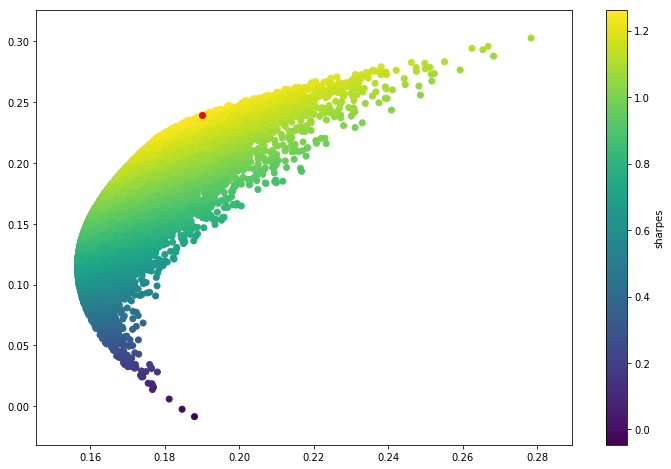

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(vol,ret,c= sharpes)
plt.colorbar(label='sharpes')

plt.scatter(vol[max_sharpe], ret[max_sharpe], c='red')

In [96]:
from google.colab import files
upload = files.upload()

Saving SPY.csv to SPY.csv


In [0]:
# CAPM 

In [107]:
spy = pd.read_csv('SPY.csv', index_col = 'Date', parse_dates = True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,183.979996,184.070007,182.479996,182.919998,164.137863,119636900
2014-01-03,183.229996,183.600006,182.630005,182.889999,164.110901,81390600
2014-01-06,183.490005,183.559998,182.080002,182.360001,163.635361,108028200
2014-01-07,183.089996,183.789993,182.949997,183.479996,164.640350,86144200
2014-01-08,183.449997,183.830002,182.889999,183.520004,164.676239,96582300


In [0]:
aapl['cum returns'] = aapl['Adj. Close']/aapl['Adj. Close'][0]
spy['cum returns'] = spy['Adj Close']/spy['Adj Close'][0]
aapl['daily returns'] = aapl['Adj. Close'].pct_change(1)
spy['daily returns'] = spy['Adj Close'].pct_change(1)

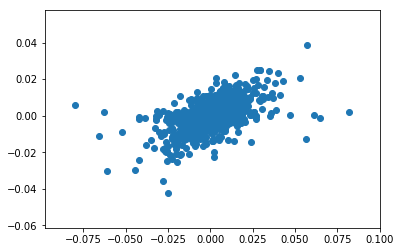

In [122]:
plt.scatter(aapl['daily returns'][1:1000], spy['daily returns'][1:1000])

In [0]:
from scipy import stats

beta, alpha, rval, pval ,stderr = stats.linregress(aapl['daily returns'][1:1000], spy['daily returns'][1:1000])

In [124]:
print ('beta: ' + str(beta))
print ('alpha: ' + str(alpha))
print ('pval: ' + str(pval))
print ('rval: ' + str(rval))


beta: 0.28806622828359346
alpha: 0.00020924812491056267
pval: 1.6469678693520413e-76
rval: 0.5394439990350721
